In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
predictions = pd.read_csv('D:/Dissertation/Final_Predictions.csv')

In [5]:
predictions.head(5)

,Unnamed: 0,Date,Tweet,Predicted Label
0,0,2023-04-25,#TheKerlaStory,Manipulator
1,1,2023-04-26,Just watched the trailer of #thekerlastory 😬\n...,Supporter
2,2,2023-04-26,@Starboy2079 #mustwatcgthekerlastory #Thekerla...,Manipulator
3,3,2023-04-26,#Thekerlastory 👍🏻👍🏻🩷🩷,Supporter
4,4,2023-04-26,#TheKerlaStory @ARanganathan72\nhttps://t.co/5...,Neutral


In [3]:
predictions['Date'] = pd.to_datetime(predictions['Date']).dt.date

C:\Users\mathe\AppData\Local\Temp\ipykernel_6352\1206651450.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  predictions['Date'] = pd.to_datetime(predictions['Date']).dt.date


In [4]:
label_counts = predictions.groupby(["Date", "Predicted Label"]).size().unstack(fill_value=0)


In [7]:
print(label_counts)

Predicted Label  Against  Manipulator  Neutral  Supporter
Date                                                     
2023-04-25             0            1        0          0
2023-04-26             0            5        1         12
2023-04-27             0            9        3         36
2023-04-28             0           12        5         36
2023-04-29             0            5        0         10
2023-04-30             1            6        0         23
2023-05-01             1            3        1         26
2023-05-02             1            9        3         36
2023-05-03             0           10       12         25
2023-05-04             0           19        7         24
2023-05-05             1           10        6         79
2023-05-06             1           21       17        133
2023-05-07            11           73       19        430
2023-05-08            33          331      160       2053
2023-05-09            49          706      282       3673
2023-05-10    

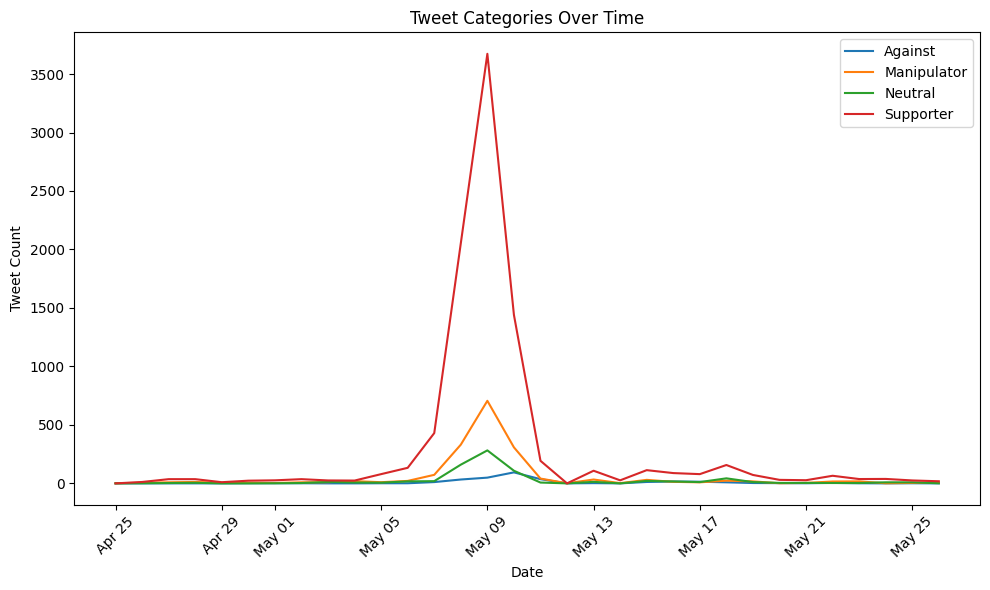

In [7]:
#label_counts.set_index("Date", inplace=True)

# Plot each label as a separate line
plt.figure(figsize=(10, 6))

for label in label_counts.columns:
    plt.plot(label_counts.index, label_counts[label], label=label)

date_format = mdates.DateFormatter('%b %d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Tweet Categories Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()